In [1]:
#NLP sobre IMDB Dataset of 50K Movie Reviews
# https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

import pandas as pd
import csv  # Importar el módulo csv

#importing dataset
# Usar on_bad_lines para manejar líneas mal formadas
df = pd.read_csv('IMDB Dataset.csv', delimiter=',', quotechar='"', on_bad_lines='skip', encoding='utf-8', low_memory=False, quoting=csv.QUOTE_MINIMAL)
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [2]:
#Checking Dataset Description
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [3]:
#Sentiment count
print("Total :\n",df['sentiment'].value_counts())

Total :
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [4]:
review = []
sentences = list(df['review'])
for sen in sentences:
    review.append(sen)

In [5]:
#Creación de etiquetas
import numpy as np

labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

In [6]:
#División de datos de entrenamiento y prueba

from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20, random_state=42)

In [7]:
# Preparar los datos
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.2)

In [8]:
# Parámetros de configuración
vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type='post'
oov_tok = "<OOV>"

In [9]:
pip install tensorflow

In [10]:
#tokenización y acolchado de secuencias

import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#initialize the tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

#Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

#Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

#Generate and pad the test sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences,maxlen=max_length, truncating=trunc_type)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense

#Construcción del modelo
model = Sequential([
    Embedding(vocab_size, embedding_dim),
    LSTM(64, return_sequences=True),
    LSTM(32),
   #Flatten(),
    Dense(6, activation='relu'), #Se ajustó de 6 a 16
    Dense(1, activation='sigmoid')
])

In [12]:
#Construcción y entrenamiento del modelo
#setup the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 111ms/step - accuracy: 0.6786 - loss: 0.5621 - val_accuracy: 0.8396 - val_loss: 0.3773
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 109ms/step - accuracy: 0.8734 - loss: 0.3156 - val_accuracy: 0.8461 - val_loss: 0.3571
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 145s 111ms/step - accuracy: 0.8971 - loss: 0.2601 - val_accuracy: 0.8492 - val_loss: 0.3643
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 109ms/step - accuracy: 0.9171 - loss: 0.2159 - val_accuracy: 0.8346 - val_loss: 0.3734
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 134s 107ms/step - accuracy: 0.9349 - loss: 0.1759 - val_accuracy: 0.8427 - val_loss: 0.4014
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 146s 110ms/step - accuracy: 0.9505 - loss: 0.1410 - val_accuracy: 0.8405 - val_loss: 0.5104
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 108ms/step - accuracy: 0.9642 - loss: 0.1088 - val_accuracy: 0.8224 - val_loss: 0.5956
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 151s 115ms/step - ac

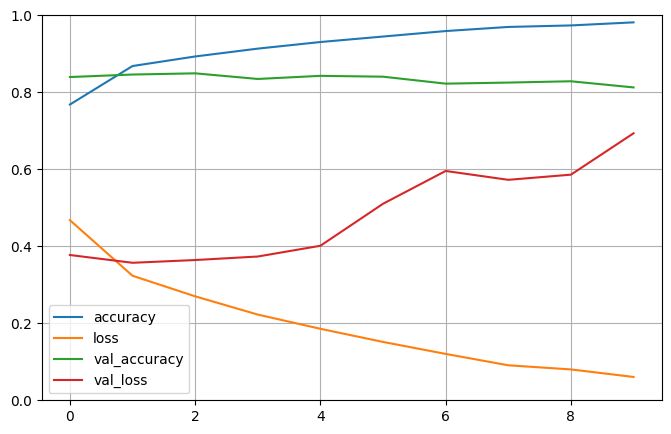

In [13]:
#train the model
import matplotlib.pyplot as plt

num_epochs = 10

history = model.fit(padded,
                    train_labels,
                    epochs=num_epochs,
                    validation_data=(test_padded, test_labels))

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


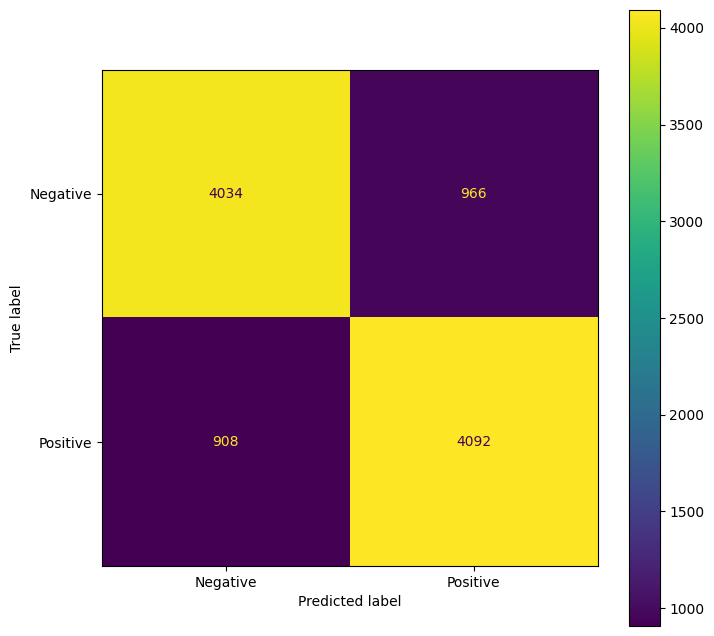

Accuracy: 0.81
F1 Score: 0.81


In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score

# Obtener las predicciones del modelo sobre el conjunto de prueba
predictions = model.predict(test_padded)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Calcular la accuracy
accuracy = accuracy_score(test_labels, predicted_labels)

# Calcular el F1 score
f1 = f1_score(test_labels, predicted_labels)

# Crear la matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])

# Graficar la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax)
plt.show()

# Mostrar la accuracy y el F1 score
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step


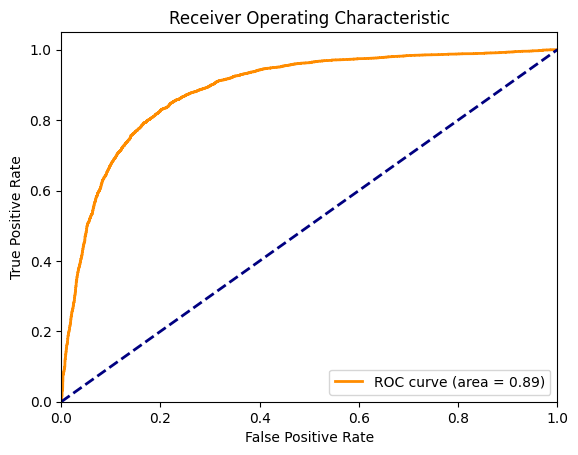

AUC: 0.89


In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de las predicciones
y_prob = model.predict(test_padded).ravel()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(test_labels, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step


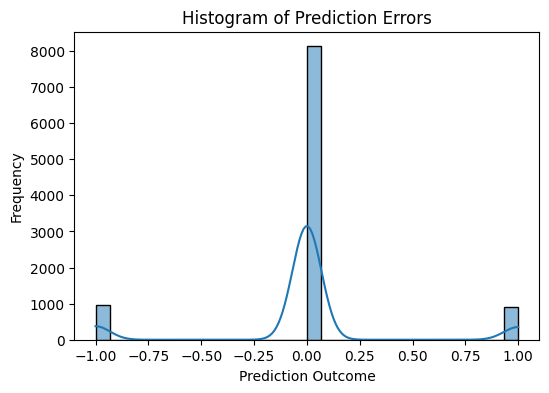

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las predicciones del modelo
y_pred = (model.predict(test_padded) > 0.5).astype("int32")

# Calcular los errores como la diferencia entre las etiquetas verdaderas y las predicciones
errors = np.array(test_labels) - np.array(y_pred).flatten()

# Crear el histograma de errores con barras más delgadas
plt.figure(figsize=(6, 4))
sns.histplot(errors, kde=True, bins=30)
plt.xlabel('Prediction Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()